In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1).values
y = df['diagnosis'].map({'M': 1, 'B': 0}).values
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
neighbors = [] 
cv_scores = [] 
for k in range(1, 21, 2): 
	neighbors.append(k) 
	knn = KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='ball_tree') 
	scores = cross_val_score(knn, x_train, y_train) 
	cv_scores.append(scores.mean()) 

The optimal number of neighbors is 9


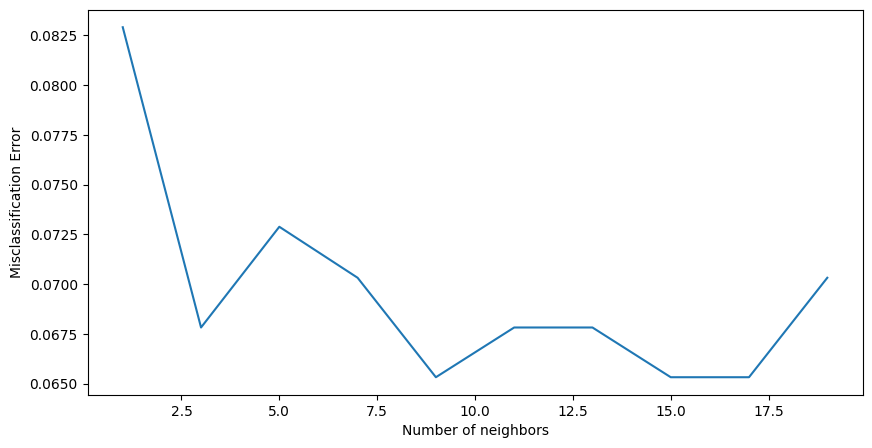

In [6]:
MSE = [1-x for x in cv_scores] 
optimal_k = neighbors[MSE.index(min(MSE))] 

print('The optimal number of neighbors is', optimal_k) 
plt.figure(figsize=(10, 5)) 
plt.plot(neighbors, MSE) 
plt.xlabel('Number of neighbors') 
plt.ylabel('Misclassification Error') 
plt.show() 

In [7]:
knn = KNeighborsClassifier(n_neighbors=9, weights='distance', algorithm='ball_tree')
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=9, weights='distance')

In [9]:
print('Training score:', knn.score(x_train, y_train))
print('Testing score:', knn.score(x_test, y_test))

Training score: 1.0
Testing score: 0.9415204678362573


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       118
           1       0.91      0.91      0.91        53

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

